## Import Libary dan dataset

In [22]:
import pandas as pd
import numpy as np
import warnings
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('/content/tourism_rating.csv')
df1 = pd.read_csv('/content/tourism_with_id.csv')

## Exploratory Data Analysis

Dataset tourism_rating

In [24]:
# menampilkan 3 overview dataset df secara random
df.sample(3)

,User_Id,Place_Id,Place_Ratings
9235,278,234,3
5879,177,173,1
2014,62,26,5


In [25]:
# cek dimensi pada dataset df
print("Total Rows: {} dan Cols: {}".format(df.shape[0], df.shape[1]))

Total Rows: 10000 dan Cols: 3


In [26]:
# cek informasi dari tiap fitur df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [27]:
# cek total user pada dataset df
len(df['User_Id'].unique())

300

In [28]:
# cek total place yang diberi rating 
len(df['Place_Id'].unique())

437

In [29]:
# cek statistika deskripsi dari dataset
df.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


Dataset tourism_with_id  

In [30]:
# menampilkan 3 overview dataset df1 secara random
df1.sample(3)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
352,353,Taman Srigunting,Merupakan salah satu landmark di Kawasan Kota ...,Taman Hiburan,Semarang,0,4.7,NaN,"{'lat': -6.9681728, 'lng': 110.4278262}",-6.968173,110.427826,NaN,353
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5
28,29,Wisata Kuliner Pecenongan,Pecenongan merupakan salah satu surga kuliner ...,Pusat Perbelanjaan,Jakarta,0,5.0,NaN,"{'lat': -6.166788700000001, 'lng': 106.8265261}",-6.166789,106.826526,NaN,29


In [31]:
# cek dimensi pada dataset df1
print("Total Rows: {} dan Cols: {}".format(df1.shape[0], df1.shape[1]))

Total Rows: 437 dan Cols: 13


In [32]:
# cek informasi dari tiap fitur df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [33]:
# cek total place pada dataset df1
len(df1['Place_Id'].unique())

437

In [34]:
# cek sebaran kota wisata pada dataset
cols = df1['City'].value_counts()
cols = cols.keys()

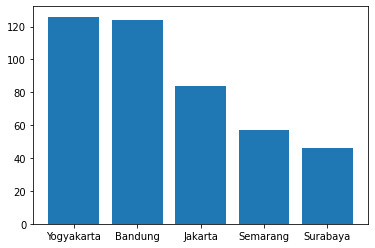

In [35]:
import matplotlib.pyplot as plt
plt.bar(x=cols,height=df1['City'].value_counts())
plt.show()

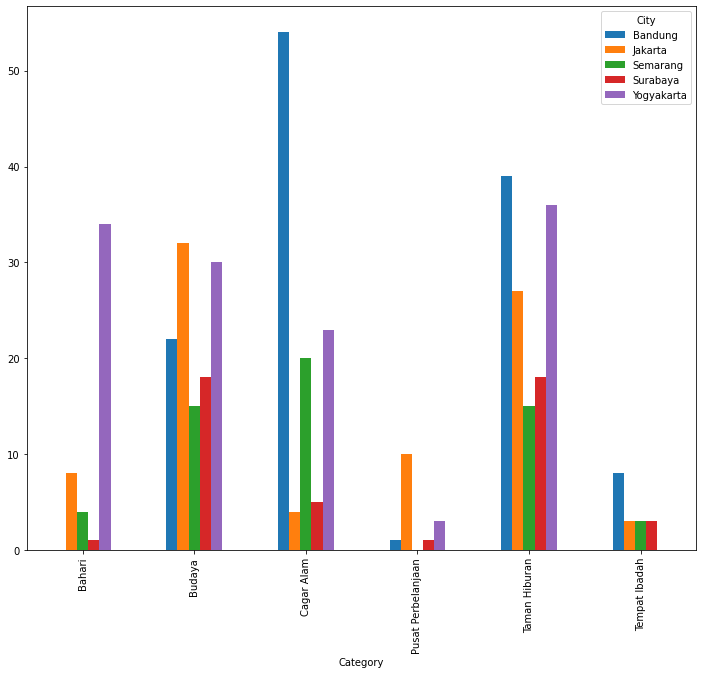

In [36]:
table = pd.crosstab(df1['Category'], df1['City'])
table.plot(kind="bar", figsize=(12,10))

In [37]:
# cek statika deskripsi dari dataset
df1.describe()

,Place_Id,Price,Rating,Time_Minutes,Lat,Long,Unnamed: 11,Unnamed: 12
count,437.000000,437.000000,437.000000,205.000000,437.000000,437.000000,0.0,437.000000
mean,219.000000,24652.173913,4.442792,82.609756,-7.095438,109.160142,NaN,219.000000
std,126.295289,66446.374709,0.208587,52.872339,0.727241,1.962848,NaN,126.295289
min,1.000000,0.000000,3.400000,10.000000,-8.197894,103.931398,NaN,1.000000
25%,110.000000,0.000000,4.300000,45.000000,-7.749590,107.578369,NaN,110.000000
50%,219.000000,5000.000000,4.500000,60.000000,-7.020524,110.237468,NaN,219.000000
75%,328.000000,20000.000000,4.600000,120.000000,-6.829411,110.431869,NaN,328.000000
max,437.000000,900000.000000,5.000000,360.000000,1.078880,112.821662,NaN,437.000000


## Data Preprocessing

In [38]:
Total = df1.isnull().sum().sort_values(ascending=False)          

Percent = (df1.isnull().sum()*100/df1.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Unnamed: 11,437,100.000000
Time_Minutes,232,53.089245
Place_Id,0,0.000000
Place_Name,0,0.000000
Description,0,0.000000
Category,0,0.000000
City,0,0.000000
Price,0,0.000000
Rating,0,0.000000
Coordinate,0,0.000000


In [39]:
df1.duplicated().sum()

0

In [40]:
df1.drop(columns=['Coordinate', 'Lat', 'Long', 'Unnamed: 11',
       'Unnamed: 12', 'Time_Minutes', 'Rating', 'Description'], inplace=True)

In [41]:
df = df1.copy()

In [42]:
df.head()

,Place_Id,Place_Name,Category,City,Price
0,1,Monumen Nasional,Budaya,Jakarta,20000
1,2,Kota Tua,Budaya,Jakarta,0
2,3,Dunia Fantasi,Taman Hiburan,Jakarta,270000
3,4,Taman Mini Indonesia Indah (TMII),Taman Hiburan,Jakarta,10000
4,5,Atlantis Water Adventure,Taman Hiburan,Jakarta,94000


## Modeling

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data city
tf.fit(df['City']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names() 

['bandung', 'jakarta', 'semarang', 'surabaya', 'yogyakarta']

In [46]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(df['City']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(437, 5)

In [47]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        ...,
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.]])

In [50]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan nama kota
# Baris diisi dengan nama tempat wisata
 
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=df.Place_Name
).sample(5, axis=1).sample(10, axis=0)

,jakarta,surabaya,bandung,semarang,yogyakarta
Place_Name,,,,,
Goa Rong,0.0,0.0,0.0,1.0,0.0
Hutan Pinus Pengger,0.0,0.0,0.0,0.0,1.0
Taman Begonia,0.0,0.0,1.0,0.0,0.0
Pulau Pari,1.0,0.0,0.0,0.0,0.0
Caringin Tilu,0.0,0.0,1.0,0.0,0.0
The Lodge Maribaya,0.0,0.0,1.0,0.0,0.0
Wisata Kraton Jogja,0.0,0.0,0.0,0.0,1.0
Curug Bugbrug,0.0,0.0,1.0,0.0,0.0
Pantai Baron,0.0,0.0,0.0,0.0,1.0


In [51]:
from sklearn.metrics.pairwise import cosine_similarity
 
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [54]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama tempat wisata
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['Place_Name'], columns=df['Place_Name'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap tempat wisata
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (437, 437)


Place_Name,Curug Cilengkrang,Rumah Sipitung,Bandros City Tour,Pelabuhan Marina,Bukit Wisata Pulepayung
Place_Name,,,,,
Kawasan Malioboro,0.0,0.0,0.0,0.0,1.0
Pantai Timang,0.0,0.0,0.0,0.0,1.0
Kauman Pakualaman Yogyakarta,0.0,0.0,0.0,0.0,1.0
Surabaya North Quay,0.0,0.0,0.0,0.0,0.0
Heha Sky View,0.0,0.0,0.0,0.0,1.0
Museum Perangko,0.0,1.0,0.0,1.0,0.0
Pantai Ngrenehan,0.0,0.0,0.0,0.0,1.0
Bukit Jamur,1.0,0.0,1.0,0.0,0.0
Pantai Ngandong,0.0,0.0,0.0,0.0,1.0


In [64]:
df[df['Place_Name'] == "Bukit Jamur"] 

,Place_Id,Place_Name,Category,City,Price
321,322,Bukit Jamur,Cagar Alam,Bandung,0


In [65]:
df[df['Place_Name'] == "Curug Cilengkrang"] 

,Place_Id,Place_Name,Category,City,Price
281,282,Curug Cilengkrang,Cagar Alam,Bandung,7500


In [60]:
def place_recommendations(place_name, similarity_data=cosine_sim_df, items=df[['Place_Name', 'City']], k=5):

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,place_name].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop place_name agar place name yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(place_name, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [61]:
df[df.Place_Name.eq('Surabaya North Quay')]

,Place_Id,Place_Name,Category,City,Price
404,405,Surabaya North Quay,Taman Hiburan,Surabaya,50000


In [62]:
place_recommendations('Surabaya North Quay')

,Place_Name,City
0,Gereja Perawan Maria Tak Berdosa Surabaya,Surabaya
1,Taman Ekspresi Dan Perpustakaan,Surabaya
2,Kenjeran Park,Surabaya
3,Kebun Bibit Wonorejo,Surabaya
4,Museum TNI AL Loka Jala Crana,Surabaya
